In [2]:
%run my_model.py

import cv2
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def int_to_char(num):
    return chr(num+65)
    
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

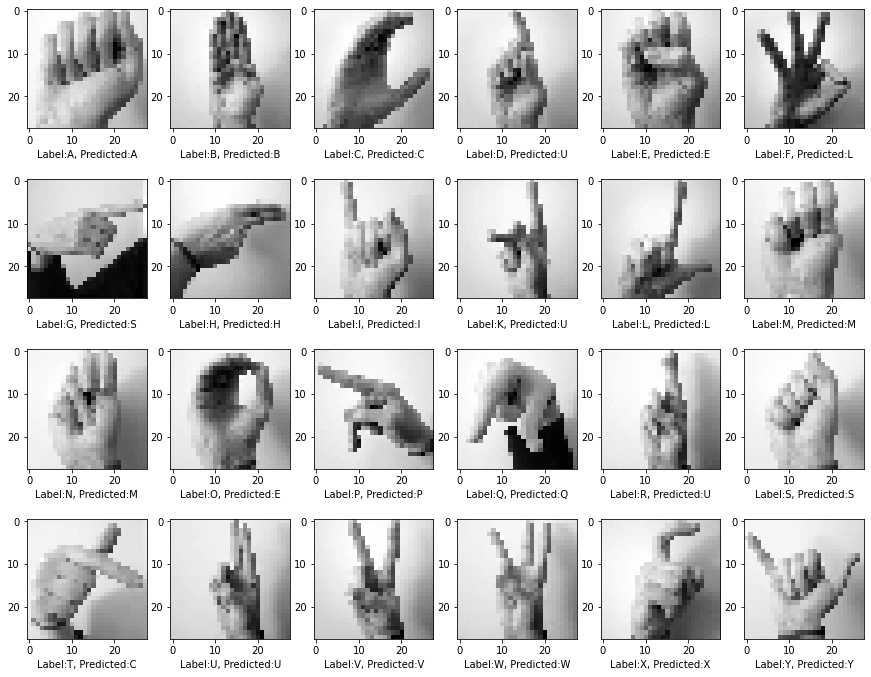

In [4]:
# Load the model weights
model = SignMnistCNNModel()
model.load_state_dict(torch.load('./models/classifier_v2.pth',map_location='cpu'))

# Load my own ASL alphabet
my_test = []
for i in range(26):
  imgname = './my_alphabet/'+int_to_char(i)+'.jpg'
  if os.path.isfile(imgname) == False:
    continue
  img = cv2.imread(imgname, 0)
  img = cv2.resize(img, (28,28))
  img = np.array(img)
  img = torch.from_numpy(img).type(torch.FloatTensor)
  img = torch.reshape(img, (1, 28, 28))
  my_test.append((img, i))

# Predict my alphabet with loaded model
plt.figure(figsize=(15,12))
for i in range(len(my_test)):
    plt.subplot(4,6,i+1)
    image, label = my_test[i]
    plt.imshow(image[0], cmap='gray')
    lbl = 'Label:'+int_to_char(label)+', Predicted:'+int_to_char(predict_image(image, model))
    plt.xlabel(lbl)
plt.show()